In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load datasets
transaction_data = pd.read_csv('transaction_data.csv')
customer_behavior = pd.read_csv('purchase_behaviour.csv')

# Data cleaning
transaction_data.dropna(inplace=True)
customer_behavior.dropna(inplace=True)

In [3]:
# Merge datasets
merged_data = pd.merge(transaction_data, customer_behavior, on='LYLTY_CARD_NBR')

# Analyze customer segments
customer_segments = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'mean', 'LYLTY_CARD_NBR': 'count'}).reset_index()

In [6]:
# Identify top products
top_products = merged_data.groupby('PROD_NAME').agg({'TOT_SALES': 'sum', 'PROD_QTY': 'sum'}).nlargest(3, 'TOT_SALES')
# Reset the index to make 'PROD_NAME' a column again
top_products = top_products.reset_index()

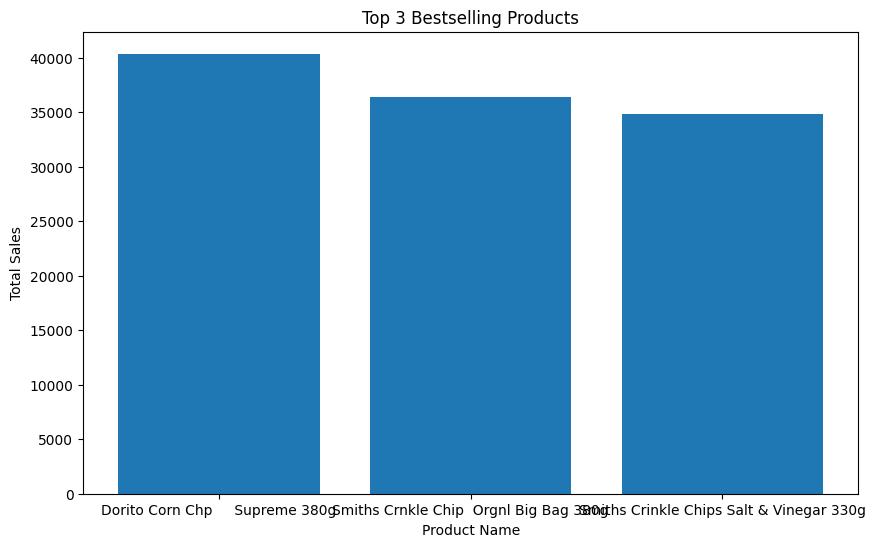

In [7]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(top_products['PROD_NAME'], top_products['TOT_SALES'])
plt.title('Top 3 Bestselling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

In [8]:
# Save findings to a summary
summary = {
    'top_products': top_products,
    'customer_segments': customer_segments
}

In [9]:
# Save the summary to a file
with open('summary.txt', 'w') as f:
    f.write(str(summary))